# Artifical Neural Network

## Import libraries and data

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [2]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
ds = pd.DataFrame(np.c_[data['data'], data['target']], columns= np.append(data['feature_names'], ['target']))

## Data Analysis

In [4]:
ds.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
ds.shape

(569, 31)

In [6]:
ds.keys()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [7]:
# [:,0:10] Interpeted as all rows for columns 0 through 10
X = ds.iloc[:,0:30]
# [:,10] Interpeted as all rows for column 10
Y = ds.iloc[:,30]

Confirm that the variables look correct

In [8]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
Y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

##  Data Preprocessing

In [10]:
from sklearn import preprocessing

# Transform features by scaling them to a given range. 
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

Compare the before and after

In [11]:
print("X= ", X)
print("X_scale= ", X_scale)

X=       mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points 

## Principal Component Analysis

Buidling on the Logistic Regression model, this study has determined that the optimal number of components should be set at 8.

In [12]:
# Apply PCA with 8 components
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scale)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)

Confirm that the data has been reduced

In [13]:
X_pca.shape

(569, 8)

## Training and testing

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
## Split the data into training and other (validation and test)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_pca, Y, test_size=0.2, random_state=40)

# Divide "other" into validation and testing
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

Confirm the division

In [16]:
print("X_train", X_train.shape), print("Y_train", Y_train.shape)
print("X_val", X_val.shape), print("Y_val", Y_val.shape)
print("X_test", X_test.shape), print("Y_test", Y_test.shape)

X_train (455, 8)
Y_train (455,)
X_val (57, 8)
Y_val (57,)
X_test (57, 8)
Y_test (57,)


(None, None)

## Buidling the ANN

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [18]:
model = Sequential([
    #1st Layer Input
    Dense(8, activation='relu', input_shape=(8,)),
    #2nd Layer Hidden
    Dense(3, activation='relu'),
    #3 Layer Output
    Dense(1, activation='sigmoid'),
])

2022-12-16 18:54:45.696447: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-16 18:54:45.696742: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [19]:
#Fitting the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
#Training the model
hist = model.fit(X_train, Y_train,
                batch_size=40, epochs=120,
                validation_data=(X_val, Y_val))

Train on 455 samples, validate on 57 samples
Epoch 1/120
455/455 [==============================] - 0s 918us/step - loss: 0.6616 - accuracy: 0.6879 - val_loss: 0.6314 - val_accuracy: 0.7895
Epoch 2/120
455/455 [==============================] - 0s 61us/step - loss: 0.6498 - accuracy: 0.7165 - val_loss: 0.6170 - val_accuracy: 0.8246
Epoch 3/120
455/455 [==============================] - 0s 64us/step - loss: 0.6387 - accuracy: 0.7385 - val_loss: 0.6037 - val_accuracy: 0.8772
Epoch 4/120
455/455 [==============================] - 0s 73us/step - loss: 0.6280 - accuracy: 0.7582 - val_loss: 0.5906 - val_accuracy: 0.8947
Epoch 5/120
455/455 [==============================] - 0s 73us/step - loss: 0.6174 - accuracy: 0.7692 - val_loss: 0.5775 - val_accuracy: 0.8947
Epoch 6/120
455/455 [==============================] - 0s 52us/step - loss: 0.6068 - accuracy: 0.7824 - val_loss: 0.5647 - val_accuracy: 0.8947
Epoch 7/120
455/455 [==============================] - 0s 57us/step - loss: 0.5963 - accur

455/455 [==============================] - 0s 46us/step - loss: 0.2252 - accuracy: 0.9319 - val_loss: 0.1353 - val_accuracy: 1.0000
Epoch 58/120
455/455 [==============================] - 0s 45us/step - loss: 0.2222 - accuracy: 0.9319 - val_loss: 0.1328 - val_accuracy: 1.0000
Epoch 59/120
455/455 [==============================] - 0s 42us/step - loss: 0.2193 - accuracy: 0.9341 - val_loss: 0.1304 - val_accuracy: 1.0000
Epoch 60/120
455/455 [==============================] - 0s 43us/step - loss: 0.2165 - accuracy: 0.9341 - val_loss: 0.1278 - val_accuracy: 1.0000
Epoch 61/120
455/455 [==============================] - 0s 43us/step - loss: 0.2138 - accuracy: 0.9341 - val_loss: 0.1257 - val_accuracy: 1.0000
Epoch 62/120
455/455 [==============================] - 0s 43us/step - loss: 0.2112 - accuracy: 0.9363 - val_loss: 0.1237 - val_accuracy: 1.0000
Epoch 63/120
455/455 [==============================] - 0s 42us/step - loss: 0.2087 - accuracy: 0.9341 - val_loss: 0.1216 - val_accuracy: 1.000

455/455 [==============================] - 0s 44us/step - loss: 0.1361 - accuracy: 0.9495 - val_loss: 0.0734 - val_accuracy: 1.0000
Epoch 114/120
455/455 [==============================] - 0s 43us/step - loss: 0.1354 - accuracy: 0.9495 - val_loss: 0.0727 - val_accuracy: 1.0000
Epoch 115/120
455/455 [==============================] - 0s 42us/step - loss: 0.1344 - accuracy: 0.9495 - val_loss: 0.0726 - val_accuracy: 1.0000
Epoch 116/120
455/455 [==============================] - 0s 42us/step - loss: 0.1337 - accuracy: 0.9516 - val_loss: 0.0717 - val_accuracy: 1.0000
Epoch 117/120
455/455 [==============================] - 0s 42us/step - loss: 0.1329 - accuracy: 0.9516 - val_loss: 0.0709 - val_accuracy: 1.0000
Epoch 118/120
455/455 [==============================] - 0s 42us/step - loss: 0.1322 - accuracy: 0.9516 - val_loss: 0.0702 - val_accuracy: 1.0000
Epoch 119/120
455/455 [==============================] - 0s 42us/step - loss: 0.1313 - accuracy: 0.9516 - val_loss: 0.0700 - val_accuracy:

## Performance Evaluation

In [21]:
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy score: ", accuracy)

57/57 [==============================] - 0s 41us/step
Accuracy score:  0.9473684430122375


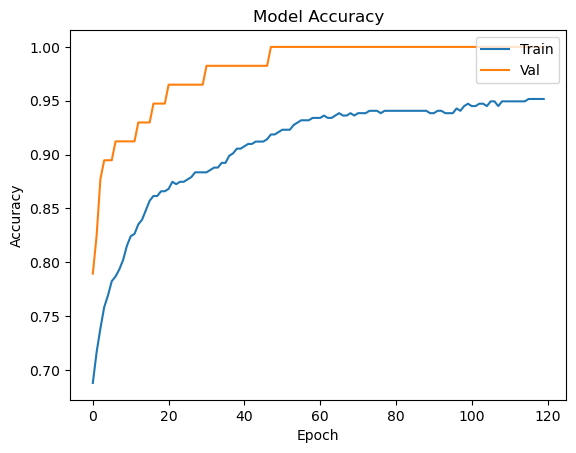

In [22]:
#Plot training vs. validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

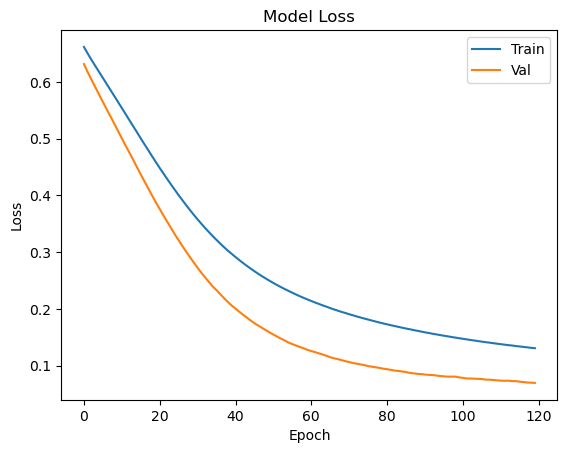

In [23]:
#Plot training vs. validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [24]:
# Making predictions based on the testing dataset. The classification threshold is set at 0.5
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [25]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred)
print("Precision score: ", precision)

Precision score:  0.9705882352941176


In [26]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, y_pred)
print("Recall score: ", recall)

Recall score:  0.9428571428571428


Text(50.722222222222214, 0.5, 'True')

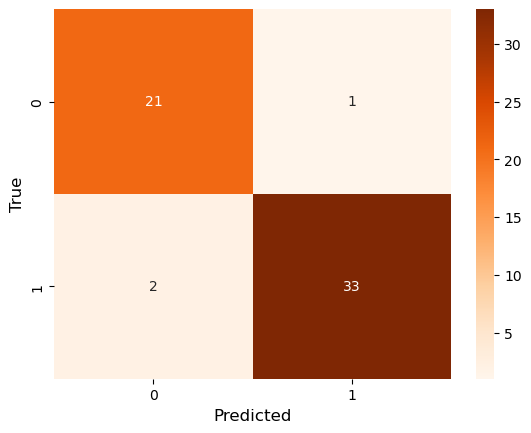

In [27]:
# Building the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Oranges')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [28]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, recall, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)
print("AUC score: ", roc_auc)

AUC score:  0.9487012987012987
